In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns

Будем использовать F-распределение. Данное распределение требует 2 числа $d_1$ и $d_2$. Зададаим эти числа:

__$d_1$__=10, __$d_2$__=20


### Мат.ожидание $M[F]$ этого распределния равно:

$$M[F]={d_2\over(d_2-2)}={20\over(20-2)}=1.11$$


### Дисперсия $D[F]$ этого распределния равна:

$$D[F]={2d_2^2(d_1+d_2-2)\over d_1(d_2-2)^2(d_2-4)}={220^2(10+20-2)\over 10(20-2)^2(20-4)}=0.43$$

In [2]:
d1=10
d2=20
x=np.linspace(0,10,1000)
y=sts.f.pdf(x, d1, d2)
f_rand=sts.f.rvs(d1, d2, size=1000)

Text(0.5, 0, '$x$')

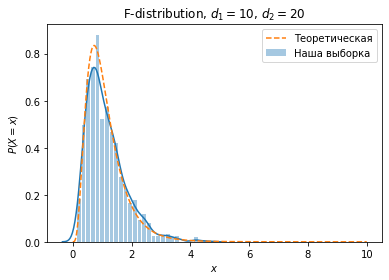

In [9]:
sns.distplot(f_rand, hist_kws={'rwidth':0.8}, label='Наша выборка')
plt.plot(x,y, label='Теоретическая', linestyle = '--')
plt.legend()
plt.title("F-distribution, $d_1=10$, $d_2=20$")
plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')


In [10]:
#Находит теоретическое и наблюдаемое среднее и стандартное отклонение
def desc(x,n):
    m_t=1.11
    std_t=np.sqrt(0.43/n)
    m_e=np.mean(x)
    std_e=np.std(x)
    return(np.around([m_t, std_t, m_e, std_e],decimals=2))

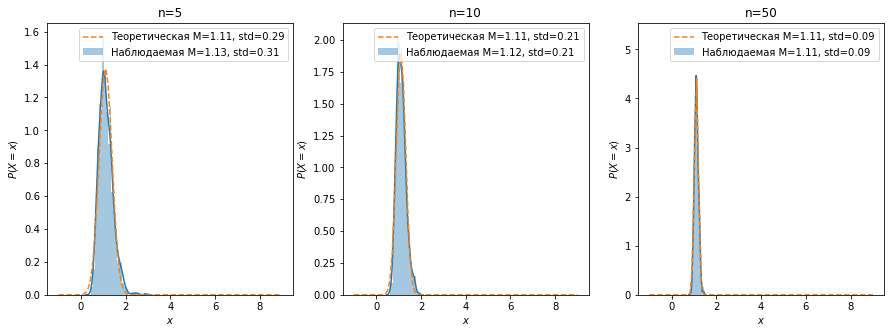

In [12]:
x=np.linspace(-1,9,100)
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), nrows=1, ncols=3)
for i in zip([5,10,50], (ax1,ax2,ax3)):
    f_mean=[]
    for _ in range(1000): #генерация 1000 наблюдений
        f=sts.f.rvs(d1, d2, size=i[0])
        f_mean.append(f.mean())
    m_t, std_t, m_e, std_e = desc(f_mean, i[0])
    y_norm=sts.norm.pdf(x,loc=1.11, scale=std_t)
    sns.distplot(ax=i[1],a=f_mean, label=f'Наблюдаемая M={m_e}, std={std_e}')
    i[1].plot(x,y_norm, label=f'Теоретическая M={m_t}, std={std_t}', linestyle = '--')
    i[1].set_title(f'n={i[0]}')
    i[1].set_ylabel('$P(X=x)$')
    i[1].set_xlabel('$x$')
    i[1].legend()

Чем больше объем выборок, тем точнее становится их выборочное среднее и меньше дисперсия